<a href="https://colab.research.google.com/github/mridul-eecs/Human-Activity-Recognition/blob/master/HARkerasimplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CNN followed by LSTM with High Dropout and large batch size


Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 7s 991us/step - loss: 1.4888 - acc: 0.3264 - val_loss: 0.9717 - val_acc: 0.5996
Epoch 2/100
7352/7352 [==============================] - 1s 95us/step - loss: 0.8175 - acc: 0.5797 - val_loss: 0.6854 - val_acc: 0.7089
Epoch 3/100
7352/7352 [==============================] - 1s 95us/step - loss: 0.5475 - acc: 0.7512 - val_loss: 0.5949 - val_acc: 0.7299
Epoch 4/100
7352/7352 [==============================] - 1s 96us/step - loss: 0.3234 - acc: 0.8727 - val_loss: 0.4560 - val_acc: 0.8432
Epoch 5/100
7352/7352 [==============================] - 1s 96us/step - loss: 0.1786 - acc: 0.9301 - val_loss: 0.3116 - val_acc: 0.8965
Epoch 6/100
7352/7352 [==============================] - 1s 96us/step - loss: 0.1395 - acc: 0.9436 - val_loss: 0.3961 - val_acc: 0.8928
Epoch 7/100
7352/7352 [==============================] - 1s 97us/step - loss: 0.1252 - acc: 0.9459 - val_loss: 0.2663 - val_acc: 0.9162

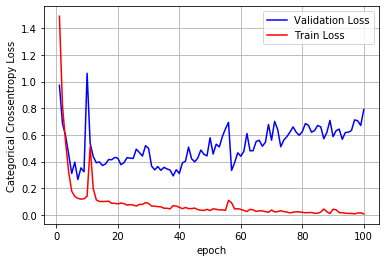

In [0]:
from keras.layers import Conv1D, BatchNormalization, Dropout, MaxPool1D, Flatten
import keras


n_epocs= 100
def modelgen(filters):
  cnnmodel= Sequential()


  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', activation='relu', kernel_initializer='he_normal')))
  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', activation='relu', kernel_initializer='he_normal')))
  cnnmodel.add((MaxPool1D(pool_size=7))) #3

  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', activation='relu', kernel_initializer='he_normal')))
  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', activation='relu', kernel_initializer='he_normal')))
  cnnmodel.add((MaxPool1D(pool_size=5))) #3

  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', activation='relu', kernel_initializer='he_normal'))
  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', activation='relu', kernel_initializer='he_normal'))
  cnnmodel.add(MaxPool1D(pool_size=3))



  # cnnmodel.add(Conv1D(filters=filters*2, kernel_size=125, padding='same', activation='relu', kernel_initializer='he_normal'))
  # cnnmodel.add(Conv1D(filters=filters*2, kernel_size=125, padding='same', activation='relu', kernel_initializer='he_normal'))
  # cnnmodel.add(MaxPool1D(pool_size=3))

  cnnmodel.add(LSTM(filters*2, return_sequences=True, activation='tanh', kernel_initializer='glorot_normal'))
  cnnmodel.add(LSTM(filters*2, return_sequences=True, activation='tanh', kernel_initializer='glorot_normal'))
  #cnnmodel.add(LSTM(filters*2, return_sequences=True, activation='tanh', kernel_initializer='glorot_normal'))
  #cnnmodel.add(LSTM(filters*2, return_sequences=True, activation='tanh', kernel_initializer='glorot_normal'))
  
  cnnmodel.add(Flatten())

  cnnmodel.add(Dense(filters**2, activation='relu', kernel_initializer='he_normal'))
  cnnmodel.add(Dropout(0.90))
  cnnmodel.add(Dense(filters**2, activation='relu', kernel_initializer='he_normal'))
  cnnmodel.add(Dropout(0.90))


  cnnmodel.add(Dense(6, activation='softmax', kernel_initializer='he_normal'))
  cnnmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])#RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

  return cnnmodel

m= modelgen(64)

history= m.fit(X_train, Y_train, batch_size=512, validation_data=(X_test, Y_test), epochs=n_epocs)
print(m.summary())


import matplotlib.pyplot as plt
%matplotlib inline

def plt_dynamic(x, vy, ty, colors=['b']):
 fig,ax = plt.subplots(1,1)
 ax.set_xlabel('epoch')
 ax.set_ylabel('Categorical Crossentropy Loss')
 ax.plot(x, vy, 'b', label="Validation Loss")
 ax.plot(x, ty, 'r', label="Train Loss")
 plt.legend()
 plt.grid()
 fig.canvas.draw()

scores = m.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)
x = list(range(1,n_epocs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, 1)


### @ CNN followed by 2LSTM Layers and dense layers 96% val loss

Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 9s 1ms/step - loss: 0.6642 - acc: 0.8527 - val_loss: 0.3438 - val_acc: 0.9080
Epoch 2/100
7352/7352 [==============================] - 1s 145us/step - loss: 0.3807 - acc: 0.9523 - val_loss: 0.3691 - val_acc: 0.9111
Epoch 3/100
7352/7352 [==============================] - 1s 143us/step - loss: 0.3429 - acc: 0.9601 - val_loss: 0.3548 - val_acc: 0.9359
Epoch 4/100
7352/7352 [==============================] - 1s 143us/step - loss: 0.3272 - acc: 0.9584 - val_loss: 0.4303 - val_acc: 0.8965
Epoch 5/100
7352/7352 [==============================] - 1s 142us/step - loss: 0.3075 - acc: 0.9607 - val_loss: 0.3730 - val_acc: 0.9257
Epoch 6/100
7352/7352 [==============================] - 1s 143us/step - loss: 0.2956 - acc: 0.9600 - val_loss: 0.3276 - val_acc: 0.9372
Epoch 7/100
7352/7352 [==============================] - 1s 144us/step - loss: 0.2662 - acc: 0.9678 - val_loss: 0.3275 - val_acc: 0.

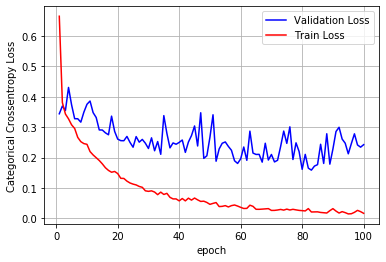

In [0]:
from keras.layers import Conv1D, Dropout, MaxPool1D, Flatten, Activation, BatchNormalization

import keras


n_epocs= 100
def modelgen(dropout):
  cnnmodel= Sequential()
  filters= 64

  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', kernel_initializer='he_normal', input_shape=(timesteps, input_dim))))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((MaxPool1D(pool_size=7))) #3

  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((MaxPool1D(pool_size=5))) #3

  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', kernel_initializer='he_normal'))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', kernel_initializer='he_normal'))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(MaxPool1D(pool_size=3))


  cnnmodel.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal'))
  cnnmodel.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal'))
  #cnnmodel.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal'))
  
  cnnmodel.add(Flatten())

  cnnmodel.add(Dense(filters**2, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(Dense(filters**2, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))


  cnnmodel.add(Dense(6, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('softmax'))

  cnnmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr= 0.001), metrics=['accuracy'])#RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

  return cnnmodel

m= modelgen(0.2)

history= m.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), epochs=n_epocs)
print(m.summary())


import matplotlib.pyplot as plt
%matplotlib inline

def plt_dynamic(x, vy, ty, colors=['b']):
 fig,ax = plt.subplots(1,1)
 ax.set_xlabel('epoch')
 ax.set_ylabel('Categorical Crossentropy Loss')
 ax.plot(x, vy, 'b', label="Validation Loss")
 ax.plot(x, ty, 'r', label="Train Loss")
 plt.legend()
 plt.grid()
 fig.canvas.draw()

scores = m.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)
x = list(range(1,n_epocs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, 1)




### @ 2LSTM Layers and dense layers 93.7% val loss

Train on 7352 samples, validate on 2947 samples
Epoch 1/100
7352/7352 [==============================] - 20s 3ms/step - loss: 0.8084 - acc: 0.7988 - val_loss: 0.7989 - val_acc: 0.7550
Epoch 2/100
7352/7352 [==============================] - 11s 2ms/step - loss: 0.5181 - acc: 0.9068 - val_loss: 0.8196 - val_acc: 0.7808
Epoch 3/100
7352/7352 [==============================] - 11s 2ms/step - loss: 0.4217 - acc: 0.9388 - val_loss: 0.6627 - val_acc: 0.8850
Epoch 4/100
7352/7352 [==============================] - 11s 2ms/step - loss: 0.3681 - acc: 0.9505 - val_loss: 0.7214 - val_acc: 0.8836
Epoch 5/100
7352/7352 [==============================] - 11s 2ms/step - loss: 0.3379 - acc: 0.9543 - val_loss: 0.5891 - val_acc: 0.9111
Epoch 6/100
7352/7352 [==============================] - 11s 2ms/step - loss: 0.3210 - acc: 0.9520 - val_loss: 0.8546 - val_acc: 0.7835
Epoch 7/100
7352/7352 [==============================] - 11s 2ms/step - loss: 0.3064 - acc: 0.9540 - val_loss: 0.4688 - val_acc: 0.9203


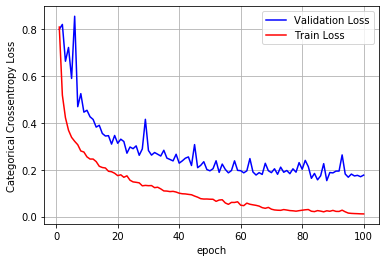

In [0]:
from keras.layers import Conv1D, Dropout, MaxPool1D, Flatten, Activation, BatchNormalization

import keras


n_epocs= 100
def modelgen(dropout):
  cnnmodel= Sequential()
  filters= 64

  '''cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', kernel_initializer='he_normal', input_shape=(timesteps, input_dim))))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((MaxPool1D(pool_size=7))) #3

  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((MaxPool1D(pool_size=5))) #3

  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', kernel_initializer='he_normal'))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', kernel_initializer='he_normal'))
  #cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(MaxPool1D(pool_size=3))'''


  cnnmodel.add(LSTM(100, return_sequences=True, kernel_initializer='glorot_normal', input_shape=(timesteps, input_dim)))
  cnnmodel.add(LSTM(100, return_sequences=True, kernel_initializer='glorot_normal'))
  #cnnmodel.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal'))
  
  cnnmodel.add(Flatten())

  cnnmodel.add(Dense(filters**2, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(Dense(filters**2, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))


  cnnmodel.add(Dense(6, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('softmax'))

  cnnmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr= 0.001), metrics=['accuracy'])#RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

  return cnnmodel

m= modelgen(0.2)

history= m.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), epochs=n_epocs)
print(m.summary())


import matplotlib.pyplot as plt
%matplotlib inline

def plt_dynamic(x, vy, ty, colors=['b']):
 fig,ax = plt.subplots(1,1)
 ax.set_xlabel('epoch')
 ax.set_ylabel('Categorical Crossentropy Loss')
 ax.plot(x, vy, 'b', label="Validation Loss")
 ax.plot(x, ty, 'r', label="Train Loss")
 plt.legend()
 plt.grid()
 fig.canvas.draw()

scores = m.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)
x = list(range(1,n_epocs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, 1)




### CNN followed by LSTM with lower learning rate

Train on 7352 samples, validate on 2947 samples
Epoch 1/150
7352/7352 [==============================] - 10s 1ms/step - loss: 0.6876 - acc: 0.8317 - val_loss: 0.5052 - val_acc: 0.8622
Epoch 2/150
7352/7352 [==============================] - 1s 142us/step - loss: 0.4325 - acc: 0.9474 - val_loss: 0.4934 - val_acc: 0.8931
Epoch 3/150
7352/7352 [==============================] - 1s 142us/step - loss: 0.3967 - acc: 0.9557 - val_loss: 0.5269 - val_acc: 0.9013
Epoch 4/150
7352/7352 [==============================] - 1s 144us/step - loss: 0.3796 - acc: 0.9600 - val_loss: 0.5264 - val_acc: 0.9077
Epoch 5/150
7352/7352 [==============================] - 1s 143us/step - loss: 0.3678 - acc: 0.9619 - val_loss: 0.5753 - val_acc: 0.9138
Epoch 6/150
7352/7352 [==============================] - 1s 144us/step - loss: 0.3600 - acc: 0.9634 - val_loss: 0.5444 - val_acc: 0.9230
Epoch 7/150
7352/7352 [==============================] - 1s 144us/step - loss: 0.3511 - acc: 0.9683 - val_loss: 0.5700 - val_acc: 0

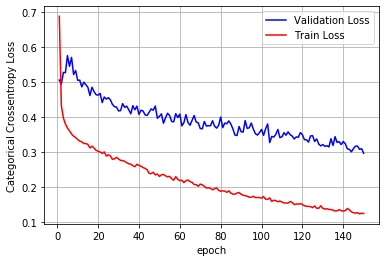

In [0]:
from keras.layers import Conv1D, Dropout, MaxPool1D, Flatten, Activation, BatchNormalization

import keras


n_epocs= 150
def modelgen(dropout):
  cnnmodel= Sequential()
  filters= 64

  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', kernel_initializer='he_normal', input_shape=(timesteps, input_dim))))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((Conv1D(filters=filters, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((MaxPool1D(pool_size=7))) #3

  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((Conv1D(filters=filters*2, kernel_size=10, padding='same', kernel_initializer='he_normal')))
  cnnmodel.add(Activation('relu'))
  cnnmodel.add((MaxPool1D(pool_size=5))) #3

  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', kernel_initializer='he_normal'))
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(Conv1D(filters=filters*4, kernel_size=10, padding='same', kernel_initializer='he_normal'))
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(MaxPool1D(pool_size=3))


  cnnmodel.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal'))
  cnnmodel.add(LSTM(50, return_sequences=True, kernel_initializer='glorot_normal'))
  
  cnnmodel.add(Flatten())

  cnnmodel.add(Dense(filters**2, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))
  cnnmodel.add(Dense(filters**2, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('relu'))


  cnnmodel.add(Dense(6, kernel_initializer='he_normal'))
  cnnmodel.add(BatchNormalization())
  cnnmodel.add(Activation('softmax'))

  cnnmodel.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr= 0.0001), metrics=['accuracy'])#RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

  return cnnmodel

m= modelgen(0.2)

history= m.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), epochs=n_epocs)
print(m.summary())


import matplotlib.pyplot as plt
%matplotlib inline

def plt_dynamic(x, vy, ty, colors=['b']):
 fig,ax = plt.subplots(1,1)
 ax.set_xlabel('epoch')
 ax.set_ylabel('Categorical Crossentropy Loss')
 ax.plot(x, vy, 'b', label="Validation Loss")
 ax.plot(x, ty, 'r', label="Train Loss")
 plt.legend()
 plt.grid()
 fig.canvas.draw()

scores = m.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print(scores)
x = list(range(1,n_epocs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, 1)


